Scaricamento dati...



--- 3. ANALISI DIREZIONALE (Chi protegge vs Chi rischia) ---


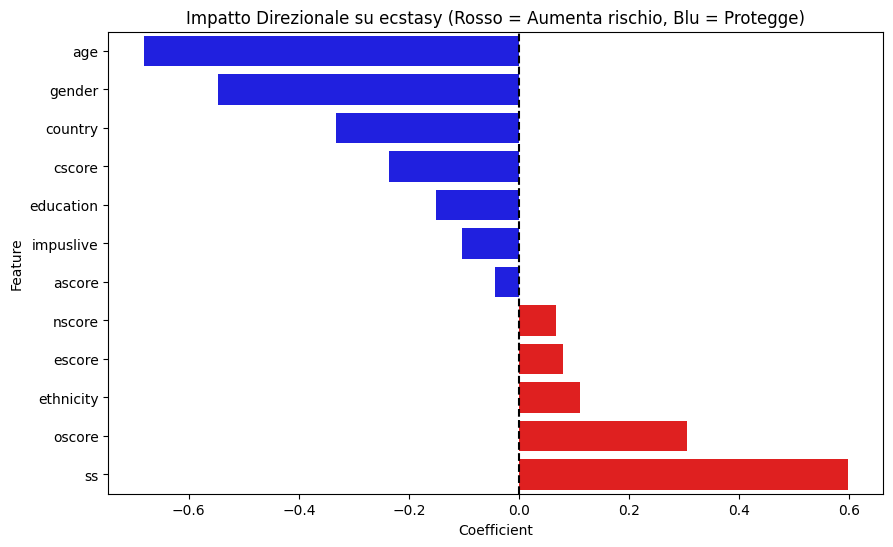

In [4]:
# SETUP DATI
!pip install ucimlrepo -q
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  # <--- AGGIUNTO QUESTO IMPORT
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc

# Scarico il dataset
print("Scaricamento dati...")
drug_consumption = fetch_ucirepo(id=373)
X = drug_consumption.data.features

targets_numeric = drug_consumption.data.targets.copy()
targets_binary = targets_numeric.replace(
    {'CL0': 0, 'CL1': 0, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
)
# -----------------------------------

# 3. INTERPRETAZIONE DIREZIONALE (Chi aumenta e chi riduce il rischio?)
print("\n--- 3. ANALISI DIREZIONALE (Chi protegge vs Chi rischia) ---")

target_drug = 'ecstasy'

y_dir = targets_binary[target_drug]

# Usiamo Regressione Logistica per vedere i coefficienti (+ o -)
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X, y_dir)

coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient')

plt.figure(figsize=(10, 6))
colors = ['red' if c > 0 else 'blue' for c in coeffs['Coefficient']]
sns.barplot(x='Coefficient', y='Feature', data=coeffs, palette=colors)
plt.title(f"Impatto Direzionale su {target_drug} (Rosso = Aumenta rischio, Blu = Protegge)")
plt.axvline(0, color='black', linestyle='--')
plt.show()